# ✅ STEP 1: Mount Google Drive

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ✅ STEP 2: Import Libraries

In [ ]:

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


# ✅ STEP 3: Set Dataset Path

In [ ]:

# Adjust path if your folder name is different
dataset_path = "/content/drive/MyDrive/leapGestRecog/leapGestRecog"
gestures = [f"{i:02}" for i in range(10)]

X, y = [], []

for idx, gesture in enumerate(gestures):
    gesture_dir = os.path.join(dataset_path, gesture)
    if not os.path.exists(gesture_dir):
        print(f"❌ Missing folder: {gesture_dir}")
        continue

    for person in os.listdir(gesture_dir):
        person_path = os.path.join(gesture_dir, person)
        if not os.path.isdir(person_path):
            continue

        for file in os.listdir(person_path):
            if file.endswith(".png"):
                img_path = os.path.join(person_path, file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    continue
                img = cv2.resize(img, (64, 64))
                X.append(img)
                y.append(idx)

print(f"✅ Loaded {len(X)} images.")


✅ Loaded 20191 images.


# ✅ STEP 4: Prepare Dataset

In [ ]:

X = np.array(X).reshape(-1, 64, 64, 1) / 255.0
y = to_categorical(y, num_classes=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ✅ STEP 5: Build the CNN Model

In [ ]:

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

# ✅ STEP 6: Train the Model

In [ ]:

history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)


Epoch 1/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 72s 174ms/step - accuracy: 0.6760 - loss: 0.9035 - val_accuracy: 0.9882 - val_loss: 0.0454
Epoch 2/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 86s 183ms/step - accuracy: 0.9884 - loss: 0.0403 - val_accuracy: 0.9824 - val_loss: 0.0398
Epoch 3/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 69s 170ms/step - accuracy: 0.9904 - loss: 0.0297 - val_accuracy: 0.9895 - val_loss: 0.0169
Epoch 4/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 82s 169ms/step - accuracy: 0.9927 - loss: 0.0183 - val_accuracy: 0.9901 - val_loss: 0.0205
Epoch 5/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 82s 169ms/step - accuracy: 0.9925 - loss: 0.0167 - val_accuracy: 0.9904 - val_loss: 0.0161
Epoch 6/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 68s 169ms/step - accuracy: 0.9942 - loss: 0.0148 - val_accuracy: 0.9879 - val_loss: 0.0217
Epoch 7/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 69s 170ms/step - accuracy: 0.9858 - loss: 0.0352 - val_accuracy: 0.9892 - val_loss: 0.0170
Epoch 8/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 82s 171ms/step - accuracy: 0.9914 - loss: 0

# ✅ STEP 7: Evaluate the Model

In [ ]:

loss, acc = model.evaluate(X_test, y_test)
print(f"🎯 Test Accuracy: {acc*100:.2f}%")


127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.9927 - loss: 0.0116
🎯 Test Accuracy: 99.18%


# ✅ STEP 8: Save the Model

In [ ]:

model.save("/content/gesture_model.h5")


 # ✅ STEP 9: Predict & Display Images from Test Set

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


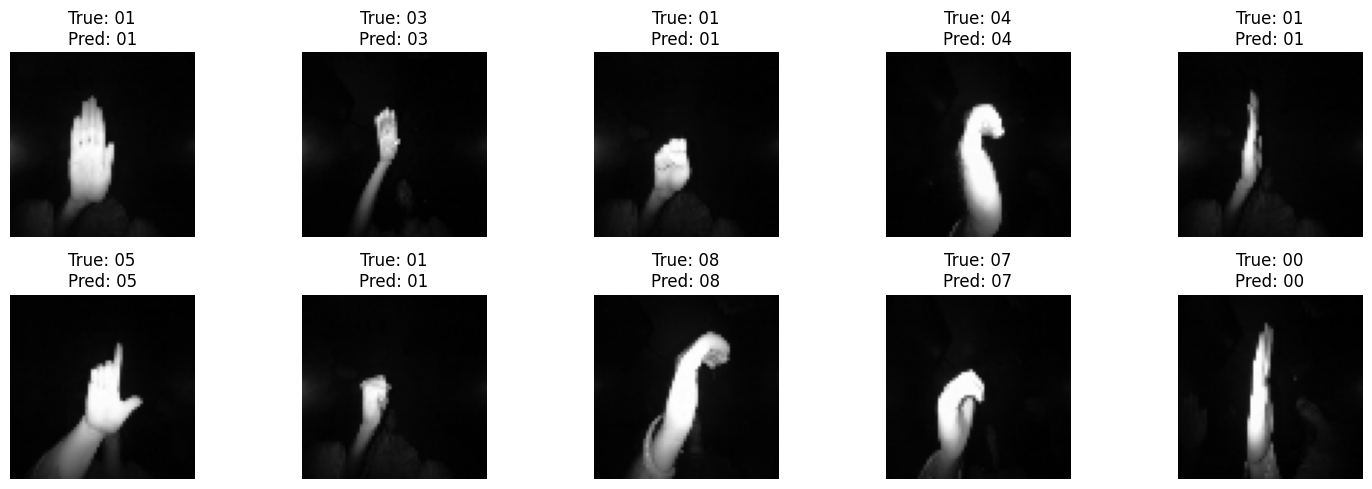

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Class label mapping (optional)
labels = {
    0: "00", 1: "01", 2: "02", 3: "03", 4: "04",
    5: "05", 6: "06", 7: "07", 8: "08", 9: "09"
}

# Load model
from tensorflow.keras.models import load_model
model = load_model("/content/gesture_model.h5")

# Pick random test images
num_images = 10
indices = np.random.choice(len(X_test), num_images)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    img = X_test[idx]
    label_true = np.argmax(y_test[idx])

    pred = model.predict(img.reshape(1, 64, 64, 1))
    label_pred = np.argmax(pred)

    plt.subplot(2, 5, i+1)
    plt.imshow(img.reshape(64, 64), cmap='gray')
    plt.title(f"True: {labels[label_true]}\nPred: {labels[label_pred]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
